In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

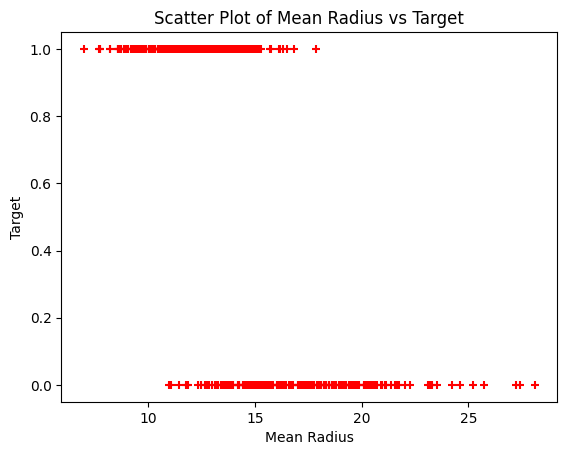

In [10]:
plt.scatter(df['mean radius'], df['target'], marker='+', color='red')
plt.xlabel('Mean Radius')
plt.ylabel('Target')
plt.title('Scatter Plot of Mean Radius vs Target')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], train_size=0.7)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_predicted = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [6]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 1.73567074  0.10792483 -0.0418928  -0.00291795 -0.06479943 -0.31935842
  -0.42639306 -0.17616498 -0.12130108 -0.01973586  0.05782709  0.83551955
   0.37629917 -0.10624316 -0.00555828 -0.07433086 -0.09207456 -0.02305941
  -0.02906366 -0.00682507  1.7492931  -0.29039787 -0.21894997 -0.01970273
  -0.11603917 -0.97653228 -1.13371187 -0.33677045 -0.35411645 -0.09783158]]
Intercept: [0.33070859]


In [7]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(features):
    z = model.intercept_ + sum([coef * feature for coef, feature in zip(model.coef_[0], features)])
    y = sigmoid(z)
    return y

# Example predictions
features_1 = X_test.iloc[0]
prediction_1 = prediction_function(features_1)
print("Prediction for example 1:", prediction_1)

features_2 = X_test.iloc[1]
prediction_2 = prediction_function(features_2)
print("Prediction for example 2:", prediction_2)

Prediction for example 1: 0.9940656751695888
Prediction for example 2: 0.9862214303362445


<ipython-input-7-46d1fc3ca46a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
